# Assignment 1. Advanced Macroeconomics: Heterogeneous Agent Models
## By Jens Brøndum Petersen, tzv598

In [83]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Setup

In [89]:
model = HANCModelClass(name='baseline') # create an instance of the model

In [90]:
par = model.par
ss = model.ss

In [91]:
#Calculate upper and lower bound
KL_min=(par.delta/(par.alpha*par.G_ss))**(1/(par.alpha-1.0))
KL_max=((1/par.beta-1+par.delta)/(par.alpha*par.Gamma_ss))**(1/(par.alpha-1.0))

KL_max

2.9208221499640707

In [92]:
par.tau_l = 0.3
par.tau_r = 0.1

# Find stationary equilibrium

In [93]:
model.find_ss(method='direct',do_print=True)

### step 1: broad search ###

guess ss.KL = 0.8603
implied ss.r = 0.2333
implied ss.w = 0.6691
household problem in ss solved in 5.0 secs [259 iterations]
household problem in ss simulated in 1.8 secs [47 iterations]
clearing_A =          nan

guess ss.KL = 1.0892
implied ss.r = 0.1826
implied ss.w = 0.7182
household problem in ss solved in 2.2 secs [307 iterations]
household problem in ss simulated in 0.0 secs [60 iterations]
clearing_A =          nan

guess ss.KL = 1.3182
implied ss.r = 0.1473
implied ss.w = 0.7605
household problem in ss solved in 3.3 secs [355 iterations]
household problem in ss simulated in 0.0 secs [76 iterations]
clearing_A =          nan

guess ss.KL = 1.5471
implied ss.r = 0.1210
implied ss.w = 0.7979
household problem in ss solved in 3.3 secs [404 iterations]
household problem in ss simulated in 0.0 secs [97 iterations]
clearing_A =          nan

guess ss.KL = 1.7761
implied ss.r = 0.1007
implied ss.w = 0.8316
household problem in ss solved in 3.5 secs [453 i

Traceback (most recent call last):
  File "C:\Users\JensB\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\JensB\AppData\Local\Temp\ipykernel_24388\2145833198.py", line 1, in <cell line: 1>
    model.find_ss(method='direct',do_print=True)
  File "C:\Users\JensB\Documents\Kandidat\4. semester\HET\Code, assignment 1\Plain model\steady_state.py", line 100, in find_ss
    if method == 'direct':
  File "C:\Users\JensB\Documents\Kandidat\4. semester\HET\Code, assignment 1\Plain model\steady_state.py", line 130, in find_ss_direct
  File "<__array_function__ internals>", line 5, in amin
  File "C:\Users\JensB\anaconda3\lib\site-packages\numpy\core\fromnumeric.py", line 2879, in amin
    return _wrapreduction(a, np.minimum, 'min', axis, None, out,
  File "C:\Users\JensB\anaconda3\lib\site-packages\numpy\core\fromnumeric.py", line 86, in _wrapreduction
    return ufunc.reduce(obj, axis, dt

In [40]:
np.sum(ss.D*ss.l)

ss.L_hh

0.008047703524081995

**Analyzing the steady state equilibrium**

In [167]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

Y              : 1.6457
C              : 1.2057
I              : 0.4400
Gamma          : 1.0000
K              : 4.4004
L              : 0.9464
B              : 1.0777
KL             : 4.6495
rk             : 0.1346
w              : 1.1129
r              : 0.0346
tau_l          : 0.3000
tau_r          : 0.1000
A_hh           : 5.4781
C_hh           : 0.9080
L_hh           : 0.9464
clearing_A     : 0.0000
clearing_C     : -0.2976
clearing_L     : -0.0000


**Policy Functions**

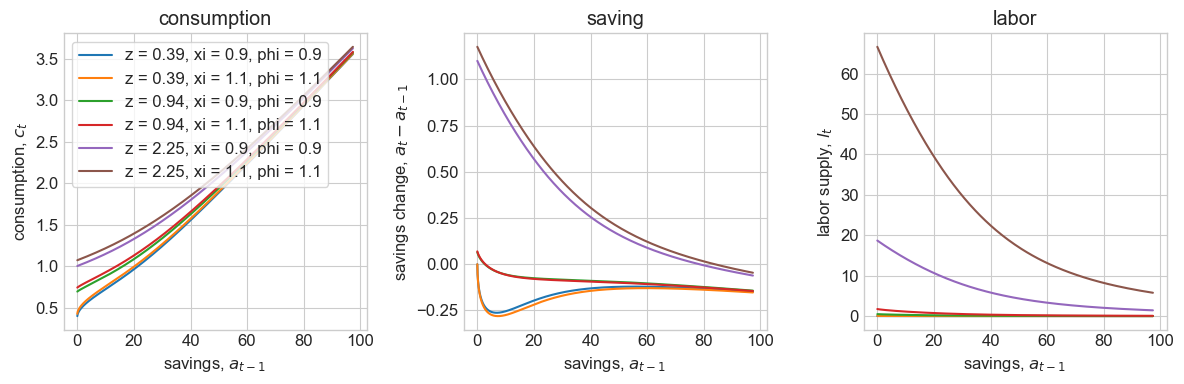

In [133]:
fig = plt.figure(figsize=(12,4),dpi=100)

I = par.a_grid < 500

# a. consumption
ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z,z in enumerate(par.z_grid):
    if i_z%3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'z = {z:.2f}, xi = 0.9, phi = 0.9')
        ax.plot(par.a_grid[I],ss.c[3,i_z,I],label=f'z = {z:.2f}, xi = 1.1, phi = 1.1')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# b. saving
ax = fig.add_subplot(1,3,2)
ax.set_title(f'saving')

for i_z,z in enumerate(par.z_grid):
    if i_z%3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I],ss.a[0,i_z,I]-par.a_grid[I],label=f'z = {z:.2f}')
        ax.plot(par.a_grid[I],ss.a[3,i_z,I]-par.a_grid[I],label=f'z = {z:.2f}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')

fig.tight_layout()

# c. labor supply
ax = fig.add_subplot(1,3,3)
ax.set_title(f'labor')

for i_z,z in enumerate(par.z_grid):
    if i_z%3 == 0 or i_z == par.Nz-1:
        ax.plot(par.a_grid[I],ss.l[0,i_z,I],label=f'z = {z:.2f}')
        ax.plot(par.a_grid[I],ss.l[3,i_z,I],label=f'z = {z:.2f}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $l_{t}$')

fig.tight_layout()


**Steady state for different values of tau_l**

In [137]:
tau_l_vec = np.linspace(0.1,0.9,5)

C_ss_tau_l = np.nan + np.zeros(len(tau_l_vec))
K_ss_tau_l = np.nan + np.zeros(len(tau_l_vec))
L_ss_tau_l = np.nan + np.zeros(len(tau_l_vec))
w_ss_tau_l = np.nan + np.zeros(len(tau_l_vec))
r_ss_tau_l = np.nan + np.zeros(len(tau_l_vec))
rk_ss_tau_l = np.nan + np.zeros(len(tau_l_vec))

for i, tau_l in enumerate(tau_l_vec):
    ss.tau_l = tau_l
    model.find_ss(method='direct',do_print=True)
    C_ss_tau_l[i] = ss.C_hh 
    K_ss_tau_l[i] = ss.K
    L_ss_tau_l[i] = ss.L_hh
    w_ss_tau_l[i] = ss.w
    r_ss_tau_l[i] = ss.r
    rk_ss_tau_l[i] = ss.rk


### step 1: broad search ###

guess ss.KL = 1.0000
implied ss.r = 0.2000
implied ss.w = 0.7000
household problem in ss solved in 14.4 secs [290 iterations]
household problem in ss simulated in 0.1 secs [53 iterations]
implied ss.A_hh = 75.1436
clearing_A =  69.06762294

guess ss.KL = 1.7500
implied ss.r = 0.1028
implied ss.w = 0.8280
household problem in ss solved in 24.4 secs [456 iterations]
household problem in ss simulated in 0.1 secs [124 iterations]
implied ss.A_hh = 85.2128
clearing_A =  79.32980983

guess ss.KL = 2.5000
implied ss.r = 0.0580
implied ss.w = 0.9215
household problem in ss solved in 30.1 secs [636 iterations]
household problem in ss simulated in 0.4 secs [680 iterations]
implied ss.A_hh = 92.8863
clearing_A =  87.96184675

guess ss.KL = 3.2500
implied ss.r = 0.0315
implied ss.w = 0.9969
household problem in ss solved in 20.5 secs [512 iterations]
household problem in ss simulated in 0.3 secs [765 iterations]
implied ss.A_hh = 3.3562
clearing_A =  -1.67844811

gues

ValueError: simulate_hh_ss(), too many iterations

**Plot results**

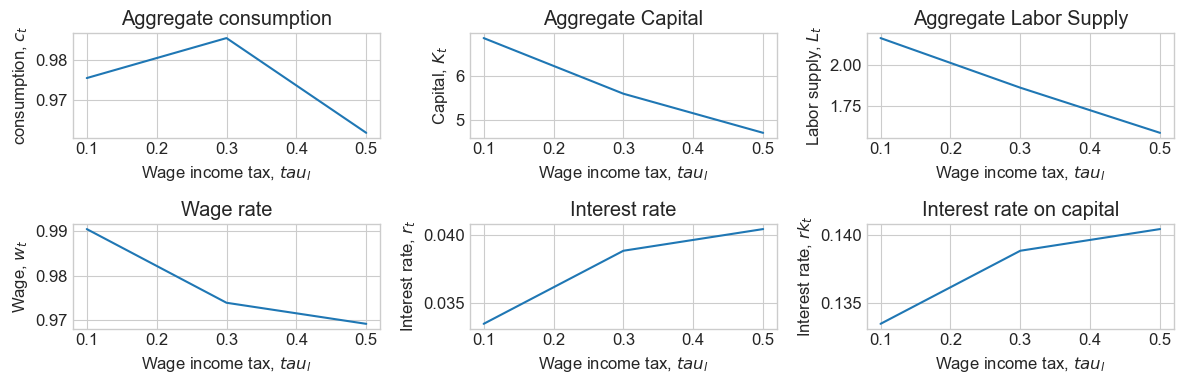

In [142]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. consumption
ax = fig.add_subplot(2,3,1)
ax.set_title(f'Aggregate consumption')

ax.plot(tau_l_vec,C_ss_tau_l)

ax.set_xlabel('Wage income tax, $tau_l$')
ax.set_ylabel('consumption, $c_t$')

# b. Capital
ax = fig.add_subplot(2,3,2)
ax.set_title(f'Aggregate Capital')

ax.plot(tau_l_vec,K_ss_tau_l)

ax.set_xlabel('Wage income tax, $tau_l$')
ax.set_ylabel('Capital, $K_t$')

# c. Labor supply
ax = fig.add_subplot(2,3,3)
ax.set_title(f'Aggregate Labor Supply')

ax.plot(tau_l_vec,L_ss_tau_l)

ax.set_xlabel('Wage income tax, $tau_l$')
ax.set_ylabel('Labor supply, $L_t$')

# d.
ax = fig.add_subplot(2,3,4)
ax.set_title(f'Wage rate')

ax.plot(tau_l_vec,w_ss_tau_l)

ax.set_xlabel('Wage income tax, $tau_l$')
ax.set_ylabel('Wage, $w_t$')

# e.
ax = fig.add_subplot(2,3,5)
ax.set_title(f'Interest rate')

ax.plot(tau_l_vec,r_ss_tau_l)

ax.set_xlabel('Wage income tax, $tau_l$')
ax.set_ylabel('Interest rate, $r_t$')

# f.
ax = fig.add_subplot(2,3,6)
ax.set_title(f'Interest rate on capital')

ax.plot(tau_l_vec,rk_ss_tau_l)

ax.set_xlabel('Wage income tax, $tau_l$')
ax.set_ylabel('Interest rate, $rk_t$')

fig.tight_layout()


**Steady state for different values of tau_r**

In [139]:
tau_r_vec = tau_l_vec

C_ss_tau_r = np.nan + np.zeros(len(tau_r_vec))
K_ss_tau_r = np.nan + np.zeros(len(tau_r_vec))
L_ss_tau_r = np.nan + np.zeros(len(tau_r_vec))
w_ss_tau_r = np.nan + np.zeros(len(tau_r_vec))
r_ss_tau_r = np.nan + np.zeros(len(tau_r_vec))
rk_ss_tau_r = np.nan + np.zeros(len(tau_r_vec))

ss.tau_l = 0.3

for i, tau_r in enumerate(tau_r_vec):
    ss.tau_r = tau_r
    model.find_ss(method='direct',do_print=True)
    C_ss_tau_r[i] = ss.C_hh 
    K_ss_tau_r[i] = ss.K
    L_ss_tau_r[i] = ss.L_hh
    w_ss_tau_r[i] = ss.w
    r_ss_tau_r[i] = ss.r
    rk_ss_tau_r[i] = ss.rk


### step 1: broad search ###

guess ss.KL = 1.0000
implied ss.r = 0.2000
implied ss.w = 0.7000
household problem in ss solved in 10.6 secs [289 iterations]
household problem in ss simulated in 0.0 secs [56 iterations]
implied ss.A_hh = 75.1390
clearing_A =  69.05233816

guess ss.KL = 1.7500
implied ss.r = 0.1028
implied ss.w = 0.8280
household problem in ss solved in 16.9 secs [450 iterations]
household problem in ss simulated in 0.1 secs [130 iterations]
implied ss.A_hh = 85.2037
clearing_A =  79.24578760

guess ss.KL = 2.5000
implied ss.r = 0.0580
implied ss.w = 0.9215
household problem in ss solved in 22.0 secs [623 iterations]
household problem in ss simulated in 0.3 secs [702 iterations]
implied ss.A_hh = 92.8780
clearing_A =  87.63179951

guess ss.KL = 3.2500
implied ss.r = 0.0315
implied ss.w = 0.9969
household problem in ss solved in 18.1 secs [527 iterations]
household problem in ss simulated in 0.3 secs [765 iterations]
implied ss.A_hh = 2.8385
clearing_A = -18.66967217

gues

KeyboardInterrupt: 

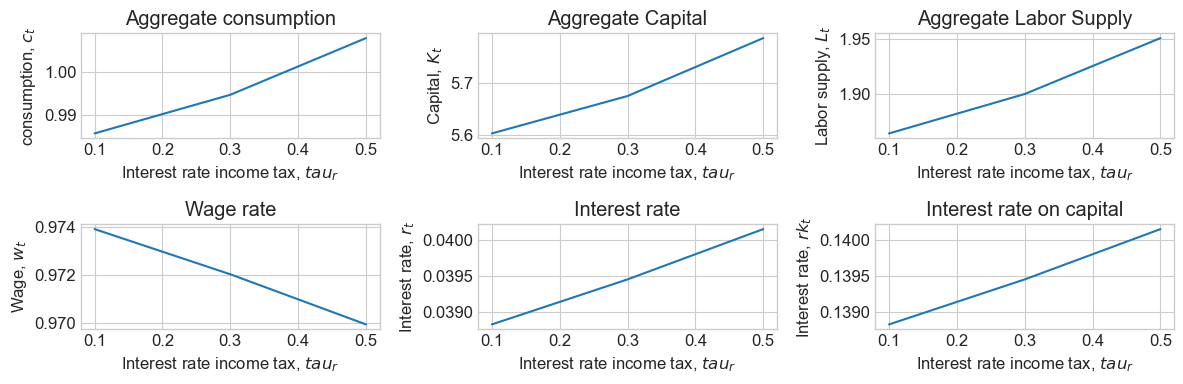

In [140]:
fig = plt.figure(figsize=(12,4),dpi=100)

# a. consumption
ax = fig.add_subplot(2,3,1)
ax.set_title(f'Aggregate consumption')

ax.plot(tau_r_vec,C_ss_tau_r)

ax.set_xlabel('Interest rate income tax, $tau_r$')
ax.set_ylabel('consumption, $c_t$')

# b. Capital
ax = fig.add_subplot(2,3,2)
ax.set_title(f'Aggregate Capital')

ax.plot(tau_r_vec,K_ss_tau_r)

ax.set_xlabel('Interest rate income tax, $tau_r$')
ax.set_ylabel('Capital, $K_t$')

# c. Labor supply
ax = fig.add_subplot(2,3,3)
ax.set_title(f'Aggregate Labor Supply')

ax.plot(tau_r_vec,L_ss_tau_r)

ax.set_xlabel('Interest rate income tax, $tau_r$')
ax.set_ylabel('Labor supply, $L_t$')

# d.
ax = fig.add_subplot(2,3,4)
ax.set_title(f'Wage rate')

ax.plot(tau_r_vec,w_ss_tau_r)

ax.set_xlabel('Interest rate income tax, $tau_r$')
ax.set_ylabel('Wage, $w_t$')

# e.
ax = fig.add_subplot(2,3,5)
ax.set_title(f'Interest rate')

ax.plot(tau_r_vec,r_ss_tau_r)

ax.set_xlabel('Interest rate income tax, $tau_r$')
ax.set_ylabel('Interest rate, $r_t$')

# f.
ax = fig.add_subplot(2,3,6)
ax.set_title(f'Interest rate on capital')

ax.plot(tau_r_vec,rk_ss_tau_r)

ax.set_xlabel('Interest rate income tax, $tau_r$')
ax.set_ylabel('Interest rate, $rk_t$')

fig.tight_layout()


**Optimal tax rates**

In [156]:
tau_l_vecr = [0.2,0.3]
tau_r_vecr = [0.3,0.4]

U = np.nan + np.zeros((len(tau_l_vecr), len(tau_r_vecr)))

for i, tau_l in enumerate(tau_l_vecr):
    for j, tau_r in enumerate(tau_r_vecr):
        ss.tau_l = tau_l
        ss. tau_r = tau_r
        model.find_ss(method='direct',do_print=True)
        
        u = np.zeros((par.Nfix, par.Nz, par.Na))
        
        for k in range(len(par.phi_grid)):
            u[k] = ss.c[k]**(1.0-par.sigma)/(1.0-par.sigma)-par.phi_grid[k]*ss.l[k]**(1+par.nu)/(1+par.nu)
        
        U[i,j] = np.sum(u*ss.D)

### step 1: broad search ###

guess ss.KL = 1.0000
implied ss.r = 0.2000
implied ss.w = 0.7000
household problem in ss solved in 16.0 secs [452 iterations]
household problem in ss simulated in 0.0 secs [49 iterations]
implied ss.A_hh = 75.1625
clearing_A =  53.93583967

guess ss.KL = 1.7500
implied ss.r = 0.1028
implied ss.w = 0.8280
household problem in ss solved in 23.2 secs [683 iterations]
household problem in ss simulated in 0.1 secs [113 iterations]
implied ss.A_hh = 85.2411
clearing_A =  61.86671630

guess ss.KL = 2.5000
implied ss.r = 0.0580
implied ss.w = 0.9215
household problem in ss solved in 30.0 secs [877 iterations]
household problem in ss simulated in 0.3 secs [611 iterations]
implied ss.A_hh = 92.9042
clearing_A =  68.39889622

guess ss.KL = 3.2500
implied ss.r = 0.0315
implied ss.w = 0.9969
household problem in ss solved in 19.1 secs [539 iterations]
household problem in ss simulated in 0.4 secs [713 iterations]
implied ss.A_hh = 3.1165
clearing_A = -10.98505262

gues

In [157]:
U

array([[-13.99543636, -14.68372439],
       [-12.76292692, -13.38576767]])

Text(0.5, 0, '$utility$')

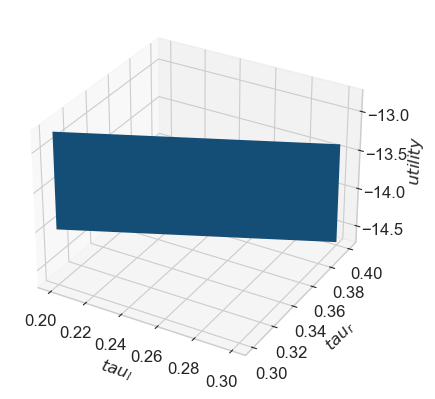

In [161]:
fig = plt.figure() # create the figure
ax = fig.add_subplot(1,1,1,projection='3d') # create a 3d type axis 
ax.plot_surface(tau_l_vecr,tau_r_vecr,U);

ax.set_xlabel('$tau_l$') # Notice latex syntax
ax.set_ylabel('$tau_r$')
ax.set_zlabel('$utility$')